## References

In [3]:
# https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24
# https://radimrehurek.com/gensim/models/ldamodel.html

## Prepare Notebook

In [15]:
# import packages
from gensim import models
import pandas as pd
import pickle
import logging
import os
from gensim import corpora, models
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# log events
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Load Test Documents

In [26]:
# load district documents for first objective
with open('tokenized_documents_district_pooling.p', 'rb') as fp:
    district_pooling_docs = pickle.load(fp)

# load month documents for second objective
with open('tokenized_documents_month_pooling.p', 'rb') as fp:
    month_pooling_docs = pickle.load(fp)

# load month and district documents for second objective
with open('tokenized_documents_district_per_month_pooling.p', 'rb') as fp:
    district_per_month_pooling_docs = pickle.load(fp)

## Load Model and Dictionary

In [17]:
# load model
lda_model =  models.LdaModel.load('lda.model')

# load dictionary
if (os.path.exists("tourism_hashtag_pooling.dict")):
   dictionary = corpora.Dictionary.load('tourism_hashtag_pooling.dict')
   print("Hashtag pooling dictionary loaded!")
else:
   print("Please train LDA model first!")

2018-09-27 07:44:15,422 : INFO : loading LdaModel object from lda.model
2018-09-27 07:44:15,426 : INFO : loading expElogbeta from lda.model.expElogbeta.npy with mmap=None
2018-09-27 07:44:15,430 : INFO : setting ignored attribute dispatcher to None
2018-09-27 07:44:15,434 : INFO : setting ignored attribute id2word to None
2018-09-27 07:44:15,434 : INFO : setting ignored attribute state to None
2018-09-27 07:44:15,438 : INFO : loaded lda.model
2018-09-27 07:44:15,438 : INFO : loading LdaState object from lda.model.state
2018-09-27 07:44:15,442 : INFO : loaded lda.model.state
2018-09-27 07:44:15,454 : INFO : loading Dictionary object from tourism_hashtag_pooling.dict
2018-09-27 07:44:15,462 : INFO : loaded tourism_hashtag_pooling.dict


Hashtag pooling dictionary loaded!


## Running Model on Test Documents

In [7]:
# apply model to district pooled documents and get topic probability distributions
district_bow_list = [dictionary.doc2bow(text) for text in district_pooling_docs]
# district_1 = district_bow_list[0]
district_topic_list = []

for index in range(len(district_bow_list)):
    district_bow = district_bow_list[index]
    topic_vector = lda_model[district_bow] # get topic probability distribution for a document
    district_topic_list.append(topic_vector)

In [8]:
# display district topic list
district_topic_list

[[(0, 0.04727041),
  (1, 0.20795411),
  (2, 0.10557274),
  (3, 0.077963635),
  (4, 0.21521024),
  (5, 0.069285311),
  (6, 0.1925519),
  (7, 0.084191695)],
 [(0, 0.053166904),
  (1, 0.10703449),
  (2, 0.065160051),
  (3, 0.038423777),
  (4, 0.068487175),
  (5, 0.055348381),
  (6, 0.55378163),
  (7, 0.058597565)],
 [(0, 0.069797918),
  (1, 0.16301768),
  (2, 0.077833071),
  (3, 0.17151947),
  (4, 0.14911883),
  (5, 0.097291537),
  (6, 0.1844978),
  (7, 0.086923704)],
 [(0, 0.058051869),
  (1, 0.24761981),
  (2, 0.070514642),
  (3, 0.085679673),
  (4, 0.11243522),
  (5, 0.076013856),
  (6, 0.14537925),
  (7, 0.20430568)],
 [(0, 0.080009297),
  (1, 0.15788928),
  (2, 0.099436283),
  (3, 0.064962387),
  (4, 0.13761866),
  (5, 0.10922177),
  (6, 0.23933949),
  (7, 0.11152287)],
 [(0, 0.075109363),
  (1, 0.12771581),
  (2, 0.18137199),
  (3, 0.084710941),
  (4, 0.20841692),
  (5, 0.084128439),
  (6, 0.18610719),
  (7, 0.052439384)],
 [(0, 0.1468025),
  (1, 0.11406162),
  (2, 0.12743127),
  (3

## Extract for Each Topic the Scores of the Districts

In [9]:
topic0 = []
topic1 = []
topic2 = []
topic3 = []
topic4 = []
topic5 = []
topic6 = []
topic7 = []

for district in range(len(district_topic_list)):
    district_dict = dict(district_topic_list[district])
    
    if 0 in district_dict.keys():
        topic0.append(district_dict[0])
    else:
        topic0.append(0)
    
    if 1 in district_dict.keys():
        topic1.append(district_dict[1])
    else:
        topic1.append(0)
    
    if 2 in district_dict.keys():
        topic2.append(district_dict[2])
    else:
        topic2.append(0)
        
    if 3 in district_dict.keys():
        topic3.append(district_dict[3])
    else:
        topic3.append(0)
        
    if 4 in district_dict.keys():
        topic4.append(district_dict[4])
    else:
        topic4.append(0)
        
    if 5 in district_dict.keys():
        topic5.append(district_dict[5])
    else:
        topic5.append(0)
    
    if 6 in district_dict.keys():
        topic6.append(district_dict[6])
    else:
        topic6.append(0)
        
    if 7 in district_dict.keys():
        topic7.append(district_dict[7])
    else:
        topic7.append(0)

In [10]:
# check topic 0 to see whether the output looks as desired
topic0

[0.04727041,
 0.053166904,
 0.069797918,
 0.058051869,
 0.080009297,
 0.075109363,
 0.1468025,
 0.088678338,
 0.056885578,
 0.047781859]

In [13]:
# define function to plot a graph to compare districts for a given topic
def district_bar_graph(districts, indices):
    """
    Function to plot district bar graph.
    
    districts: list with topic scores for each district
    indices: list of district number
    """
    assert len(districts) == len(indices)
    n = len(districts)
    x = np.arange(n)
    plt.figure(figsize=(10,7))
    plt.bar(x, districts, width=0.5, tick_label=indices, align='center')
    plt.xlabel('District')
    plt.ylabel('Topic Score')

## Topic 0: Fitness & Sports

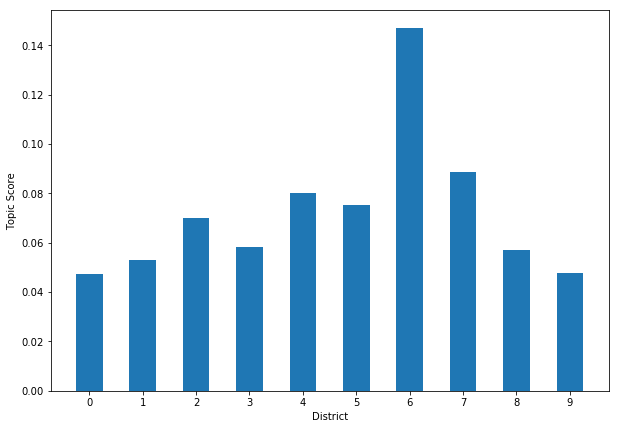

In [14]:
# plot topic scores
district_bar_graph(topic0,
                   list(range(len(topic0))))
plt.show()

## Topic 1: Summer, Sun, Beach

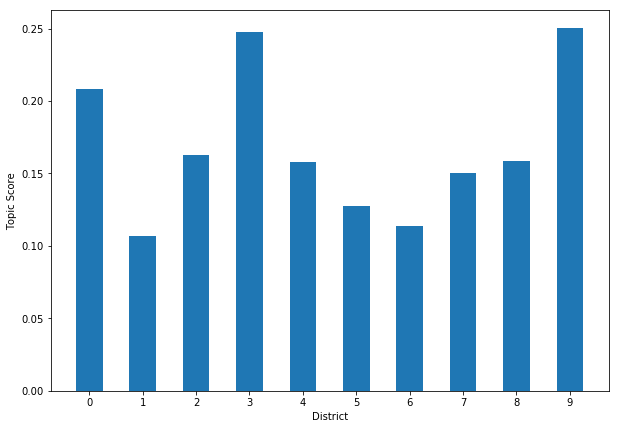

In [15]:
# plot topic scores
district_bar_graph(topic1,
                   list(range(len(topic1))))
plt.show()

## Topic 2: Travel

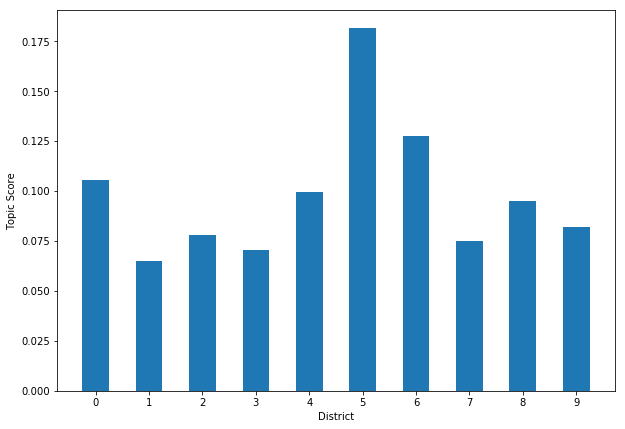

In [16]:
# plot topic scores
district_bar_graph(topic2,
                   list(range(len(topic2))))
plt.show()

## Topic 3: Streetart & Urban Life

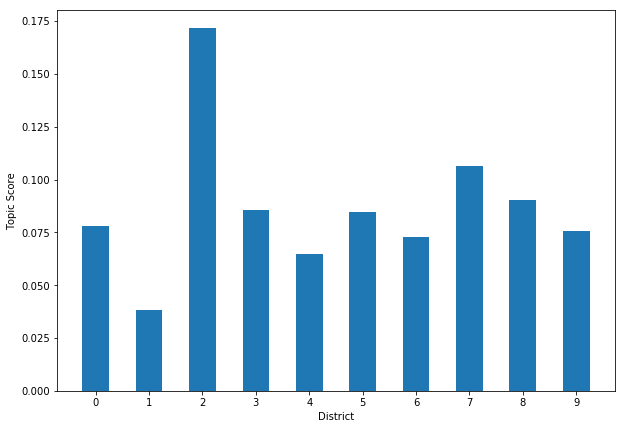

In [17]:
# plot topic scores
district_bar_graph(topic3,
                   list(range(len(topic3))))
plt.show()

## Topic 4: Art

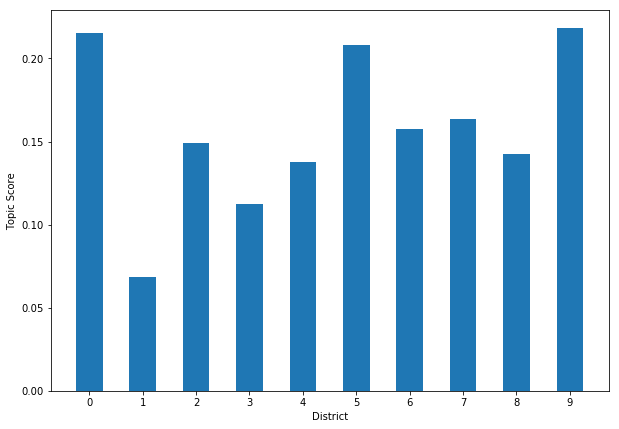

In [18]:
# plot topic scores
district_bar_graph(topic4,
                   list(range(len(topic4))))
plt.show()

## Topic 5: Lifestyle & Other

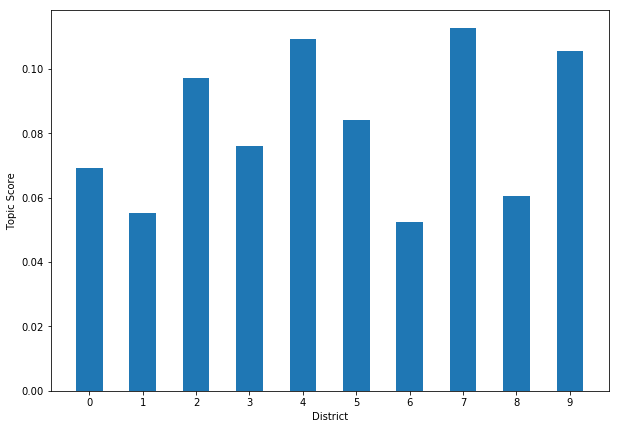

In [19]:
# plot topic scores
district_bar_graph(topic5,
                   list(range(len(topic5))))
plt.show()

## Topic 6: Sightseeing

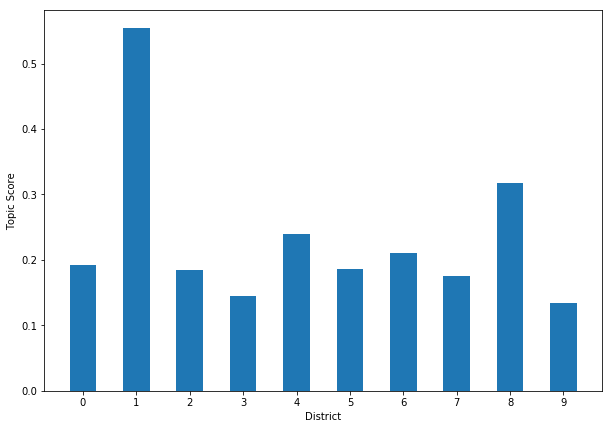

In [20]:
# plot topic scores
district_bar_graph(topic6,
                   list(range(len(topic6))))
plt.show()

## Topic 7: Gastronomy

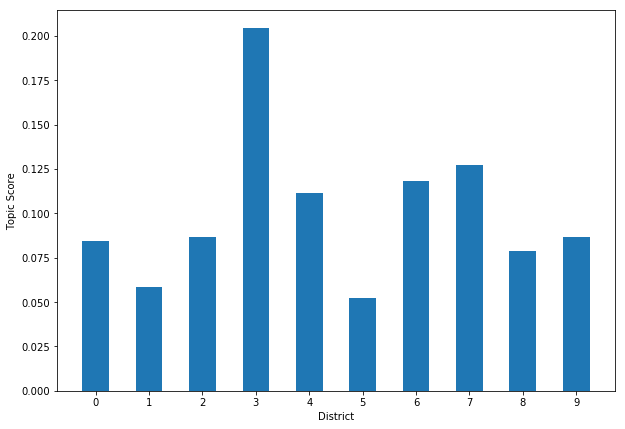

In [21]:
# plot topic scores
district_bar_graph(topic7,
                   list(range(len(topic7))))
plt.show()

## Combine Results into a Dataframe

In [81]:
# create districts dataframe
dictionary = {"district": ["01","02","03","04","05","06","07","08","09","10"],
              "topic0": topic0,
              "topic1": topic1,
              "topic2": topic2,
              "topic3": topic3,
              "topic4": topic4,
              "topic5": topic5,
              "topic6": topic6,
              "topic7": topic7}
districts = pd.DataFrame(dictionary)

In [82]:
# display dataframe and set index
districts.set_index("district")

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7
district,,,,,,,,
01,0.047270,0.207954,0.105573,0.077964,0.215210,0.069285,0.192552,0.084192
02,0.053167,0.107034,0.065160,0.038424,0.068487,0.055348,0.553782,0.058598
03,0.069798,0.163018,0.077833,0.171519,0.149119,0.097292,0.184498,0.086924
04,0.058052,0.247620,0.070515,0.085680,0.112435,0.076014,0.145379,0.204306
05,0.080009,0.157889,0.099436,0.064962,0.137619,0.109222,0.239339,0.111523
06,0.075109,0.127716,0.181372,0.084711,0.208417,0.084128,0.186107,0.052439
07,0.146802,0.114062,0.127431,0.072802,0.157818,0.052415,0.210644,0.118025
08,0.088678,0.150307,0.075208,0.106539,0.163468,0.112541,0.175883,0.127376
09,0.056886,0.158481,0.094985,0.090266,0.142782,0.060511,0.317354,0.078736


## Save Results to a CSV File

In [85]:
# ignore this part! (not necessary, is now done in the R script instead!)

# Ensure that excel will not delete leading 0s
# districts.district = districts.district.apply('"={}"'.format)
# districts.district = districts.district.apply(lambda x: str(x))

In [83]:
districts

,district,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7
0,01,0.047270,0.207954,0.105573,0.077964,0.215210,0.069285,0.192552,0.084192
1,02,0.053167,0.107034,0.065160,0.038424,0.068487,0.055348,0.553782,0.058598
2,03,0.069798,0.163018,0.077833,0.171519,0.149119,0.097292,0.184498,0.086924
3,04,0.058052,0.247620,0.070515,0.085680,0.112435,0.076014,0.145379,0.204306
4,05,0.080009,0.157889,0.099436,0.064962,0.137619,0.109222,0.239339,0.111523
5,06,0.075109,0.127716,0.181372,0.084711,0.208417,0.084128,0.186107,0.052439
6,07,0.146802,0.114062,0.127431,0.072802,0.157818,0.052415,0.210644,0.118025
7,08,0.088678,0.150307,0.075208,0.106539,0.163468,0.112541,0.175883,0.127376
8,09,0.056886,0.158481,0.094985,0.090266,0.142782,0.060511,0.317354,0.078736
9,10,0.047782,0.250085,0.081938,0.075497,0.218107,0.105621,0.134151,0.086820


In [84]:
districts.to_csv("districts.csv", encoding='utf-8')

## Next Part: Dynamic Analysis

In [21]:
district_per_month_pooling_docs

[['boy',
  'hurt',
  'brain',
  'gothic',
  'quarter',
  'hearbeat',
  '#boyfriend',
  '#bf',
  '#love',
  '#partners',
  '#europe',
  '#catala',
  '#adeu',
  '#gordito',
  '#cosita',
  'sensibistro',
  '#tteeturns30',
  '#sydorkosinspain17',
  '#pinxtosforpip',
  'one',
  'best',
  'place',
  'last',
  'night',
  'dinner',
  'fondaespanya',
  '#sydorkosinspain17',
  '#pinxtosforpip',
  'feel',
  'like',
  'engine',
  'engine',
  '//',
  'pentagon',
  'moll',
  'fusta',
  'night',
  '#sunkissed',
  'gothic',
  'quarter',
  'always',
  'trust',
  'experienced',
  'lady',
  'know',
  'drink',
  '#holidays',
  '#apero',
  'lunchtime',
  'sun',
  '#goodafternoon',
  '#craftbeer',
  'blacklabbcn',
  'playa',
  'barceloneta',
  'street',
  'photographer',
  'gothic',
  'quarter',
  'posted',
  'photo',
  'c/mònec',
  '14',
  'ramon',
  'cuberta',
  'atelier',
  'exited',
  'premiere',
  'shokobcn',
  'catch',
  'thursday',
  '15',
  'june',
  '#shoko',
  '#shokobarcelona',
  'last',
  'summe

In [27]:
# delete last 2 docs (december)
del(district_per_month_pooling_docs[-1])
del(district_per_month_pooling_docs[-1])
len(district_per_month_pooling_docs)

60

In [28]:
# define function to apply the model to unseen documents (similar procedure to above where it was applied to the district docs)
def run_lda_on_test_doc(docs):
    bow_list = [dictionary.doc2bow(text) for text in docs]
    topic_list = []
    
    for index in range(len(bow_list)):
        bow = bow_list[index]
        topic_vector = lda_model[bow]
        topic_list.append(topic_vector)
        
    return topic_list

In [29]:
topics_month = run_lda_on_test_doc(month_pooling_docs)
topics_district_per_month = run_lda_on_test_doc(district_per_month_pooling_docs)

In [30]:
topics_district_per_month

[[(0, 0.038571969),
  (1, 0.29936373),
  (2, 0.058830317),
  (3, 0.059319638),
  (4, 0.23131864),
  (5, 0.069857858),
  (6, 0.17974804),
  (7, 0.062989809)],
 [(0, 0.034859408),
  (1, 0.078459099),
  (2, 0.077661507),
  (3, 0.048780605),
  (4, 0.076797076),
  (5, 0.075538836),
  (6, 0.53515673),
  (7, 0.072746761)],
 [(0, 0.027336804),
  (1, 0.15746754),
  (2, 0.063727237),
  (3, 0.28704724),
  (4, 0.095937833),
  (5, 0.19513057),
  (6, 0.13055408),
  (7, 0.042798672)],
 [(1, 0.35425961),
  (3, 0.076409273),
  (4, 0.088137887),
  (5, 0.10118144),
  (6, 0.15727289),
  (7, 0.21302009)],
 [(0, 0.11219296),
  (1, 0.28299013),
  (2, 0.039987691),
  (3, 0.10757522),
  (4, 0.191728),
  (5, 0.10279333),
  (6, 0.13837706),
  (7, 0.024355603)],
 [(0, 0.051918611),
  (1, 0.19908327),
  (2, 0.1326921),
  (3, 0.13941731),
  (4, 0.24331586),
  (5, 0.067529514),
  (6, 0.16576909)],
 [(0, 0.55532789),
  (1, 0.031246459),
  (2, 0.022968905),
  (3, 0.056355055),
  (4, 0.10820877),
  (5, 0.018550815),
  

In [32]:
md_topic0 = []
md_topic1 = []
md_topic2 = []
md_topic3 = []
md_topic4 = []
md_topic5 = []
md_topic6 = []
md_topic7 = []

for month_district in range(len(topics_district_per_month)):
    district_month_dict = dict(topics_district_per_month[month_district])
    
    if 0 in district_month_dict.keys():
        md_topic0.append(district_month_dict[0])
    else:
        md_topic0.append(0)
    
    if 1 in district_month_dict.keys():
        md_topic1.append(district_month_dict[1])
    else:
        md_topic1.append(0)
    
    if 2 in district_month_dict.keys():
        md_topic2.append(district_month_dict[2])
    else:
        md_topic2.append(0)
        
    if 3 in district_month_dict.keys():
        md_topic3.append(district_month_dict[3])
    else:
        md_topic3.append(0)
        
    if 4 in district_month_dict.keys():
        md_topic4.append(district_month_dict[4])
    else:
        md_topic4.append(0)
        
    if 5 in district_month_dict.keys():
        md_topic5.append(district_month_dict[5])
    else:
        md_topic5.append(0)
    
    if 6 in district_month_dict.keys():
        md_topic6.append(district_month_dict[6])
    else:
        md_topic6.append(0)
        
    if 7 in district_month_dict.keys():
        md_topic7.append(district_month_dict[7])
    else:
        md_topic7.append(0)

In [48]:
district_list = ["01","02","03","04","05","06","07","08","09","10"] * 6
month_list = ["06"] * 10 + ["07"] * 10 + ["08"] * 10 + ["09"] * 10 + ["10"] * 10 + ["11"] * 10

In [49]:
# create districts dataframe
md_dictionary = {"district": district_list,
              "month": month_list,
              "topic0": md_topic0,
              "topic1": md_topic1,
              "topic2": md_topic2,
              "topic3": md_topic3,
              "topic4": md_topic4,
              "topic5": md_topic5,
              "topic6": md_topic6,
              "topic7": md_topic7}
month_districts = pd.DataFrame(md_dictionary)

In [50]:
month_districts

,district,month,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7
0,01,06,0.038572,0.299364,0.058830,0.059320,0.231319,0.069858,0.179748,0.062990
1,02,06,0.034859,0.078459,0.077662,0.048781,0.076797,0.075539,0.535157,0.072747
2,03,06,0.027337,0.157468,0.063727,0.287047,0.095938,0.195131,0.130554,0.042799
3,04,06,0.000000,0.354260,0.000000,0.076409,0.088138,0.101181,0.157273,0.213020
4,05,06,0.112193,0.282990,0.039988,0.107575,0.191728,0.102793,0.138377,0.024356
5,06,06,0.051919,0.199083,0.132692,0.139417,0.243316,0.067530,0.165769,0.000000
6,07,06,0.555328,0.031246,0.022969,0.056355,0.108209,0.018551,0.060946,0.146396
7,08,06,0.460704,0.000000,0.000000,0.000000,0.282735,0.036470,0.080373,0.136363
8,09,06,0.000000,0.085686,0.000000,0.166157,0.249253,0.403277,0.000000,0.086535
9,10,06,0.056143,0.219767,0.083901,0.051138,0.205058,0.105317,0.178252,0.100423


## Save Results to a CSV File

In [55]:
month_districts.to_csv("month_districts.csv", encoding='utf-8')